# 비지도 학습과 데이터 전처리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 3.4.1 주성분 분석(PCA)

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 3.4.1 주성분 분석 (PCA)

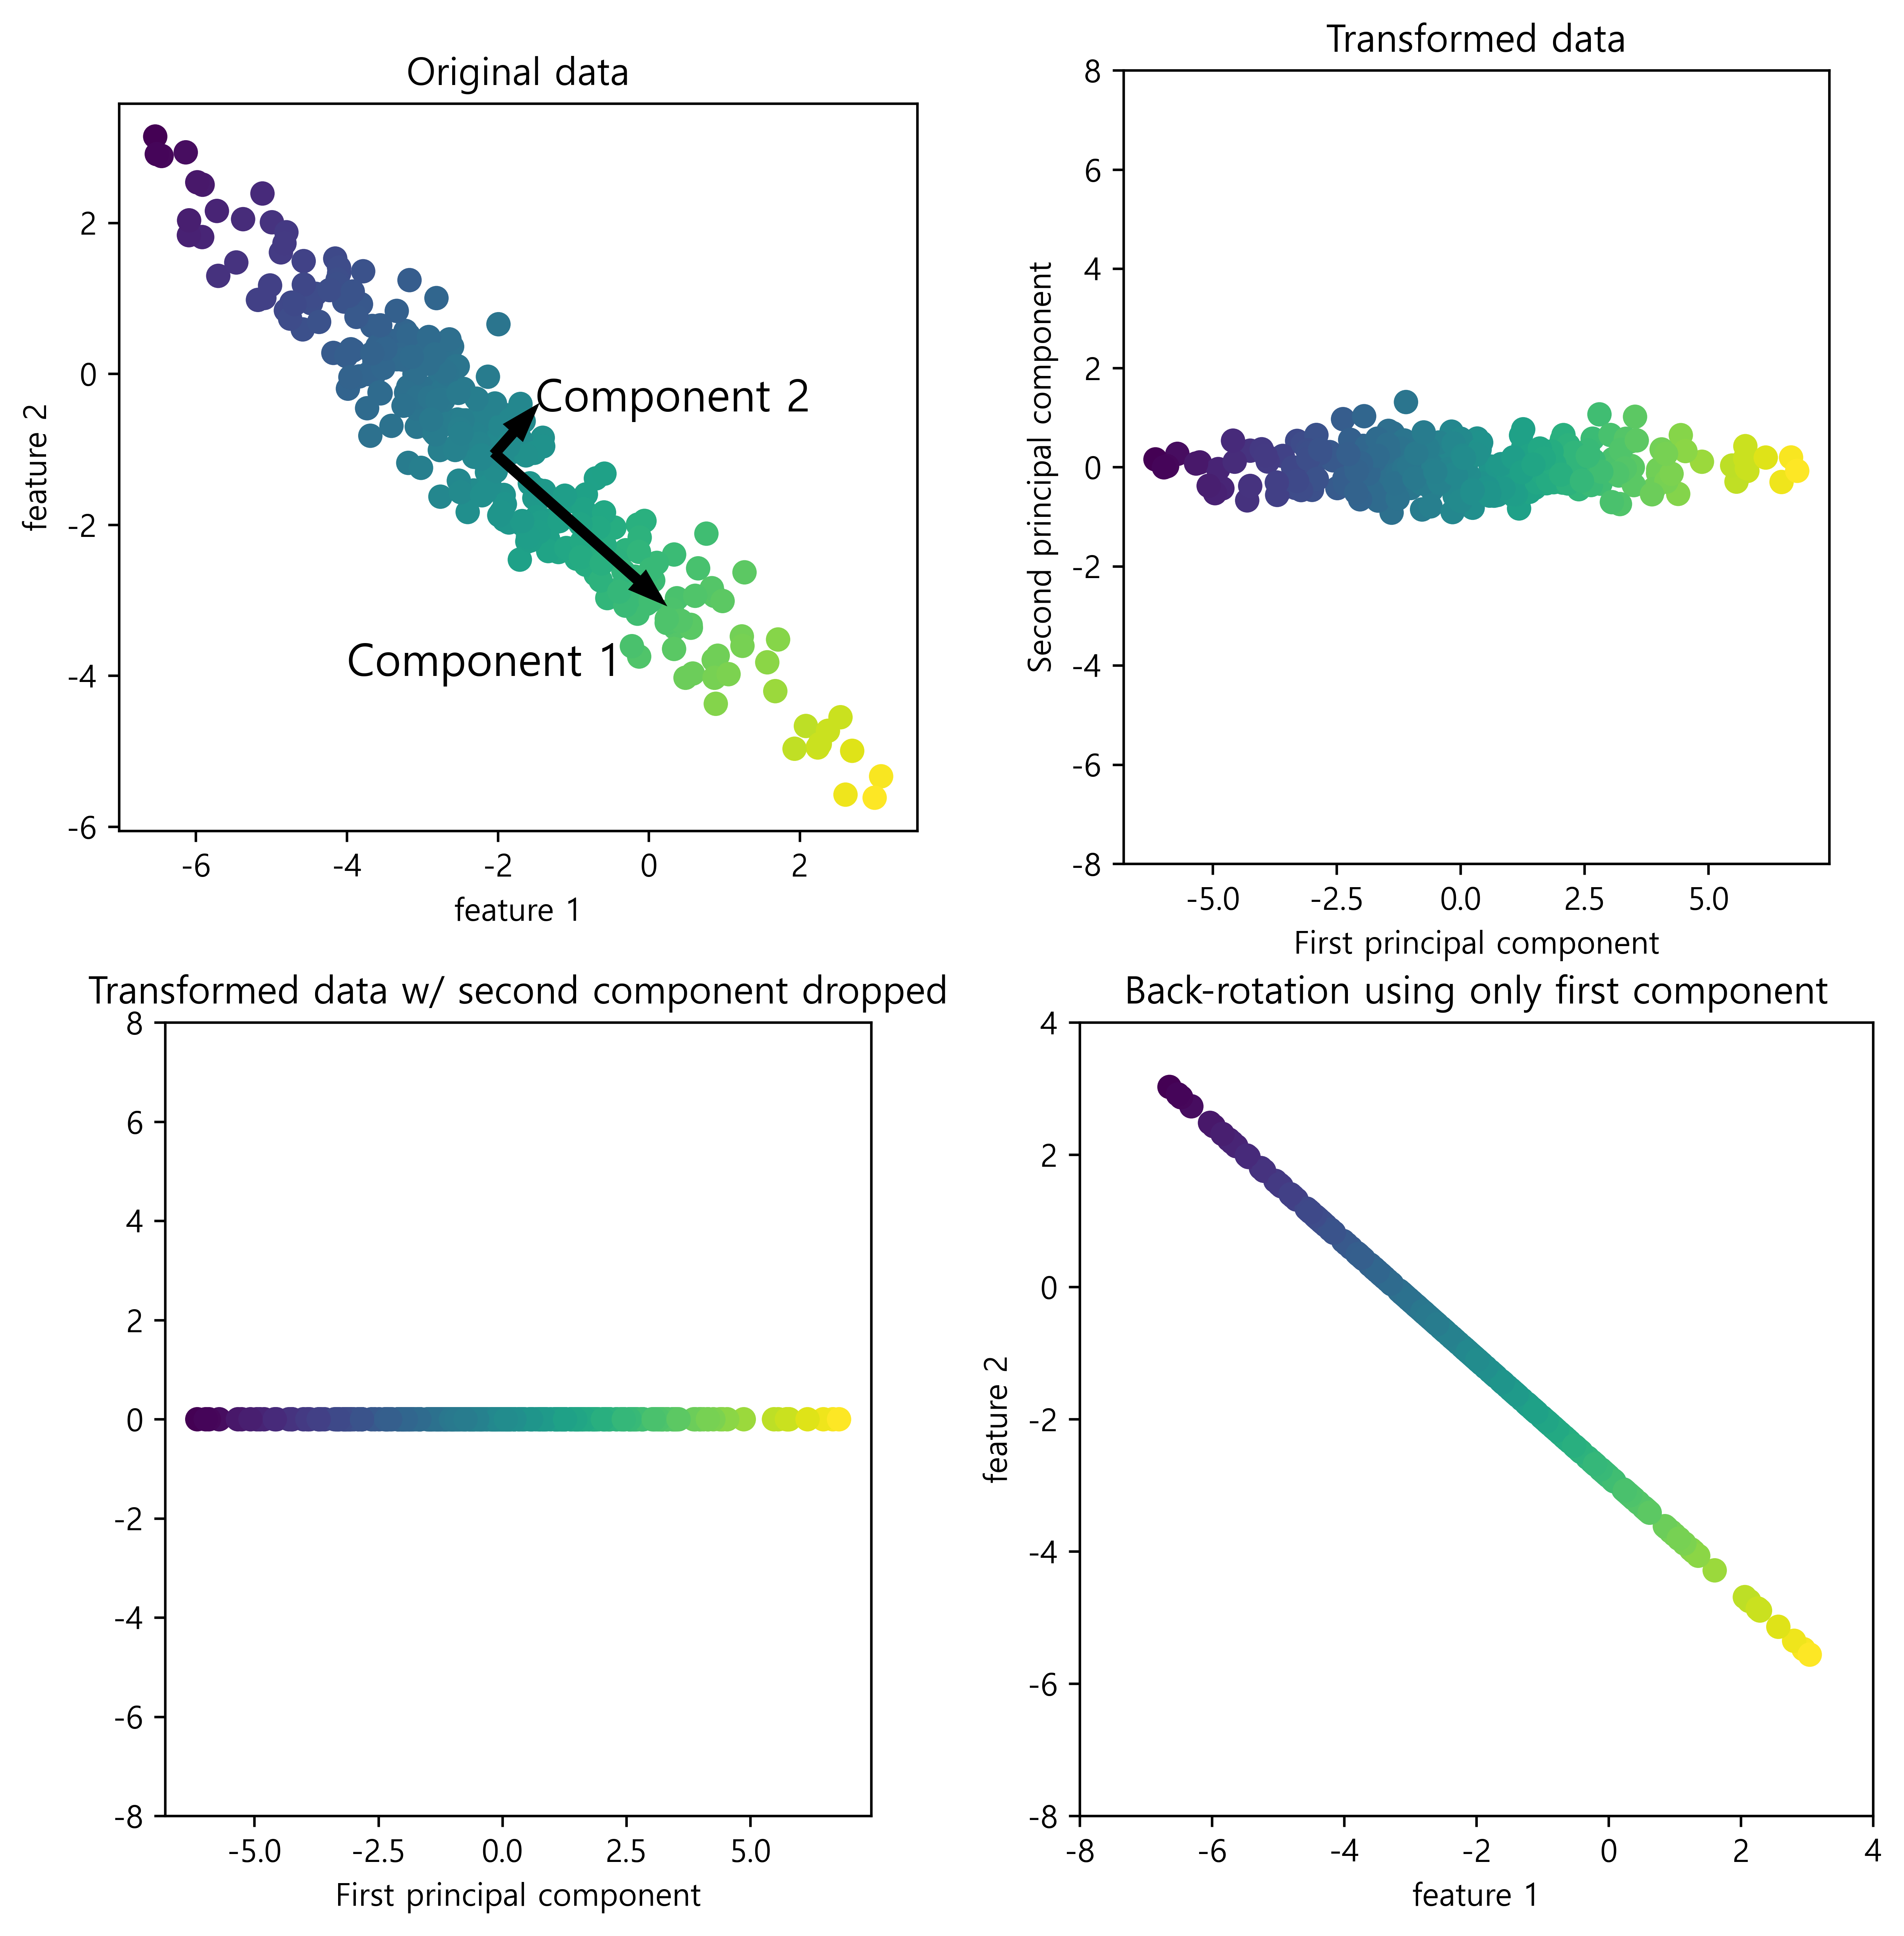

In [3]:
mglearn.plots.plot_pca_illustration()

### PCA를 적용해 데이터셋 시각화하기

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

### PCA-Q1. StandardScaler로 데이터 변환하기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
x_scaled = scaler.fit(cancer.data).transform(cancer.data)

### PCA-Q2. PCA로 데이터 변환하기

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)
X_pca = pca.transform(x_scaled)
print(x_scaled.shape, X_pca.shape)

(569, 30) (569, 2)


### PCA-Q3. PCA 데이터 시각화하기

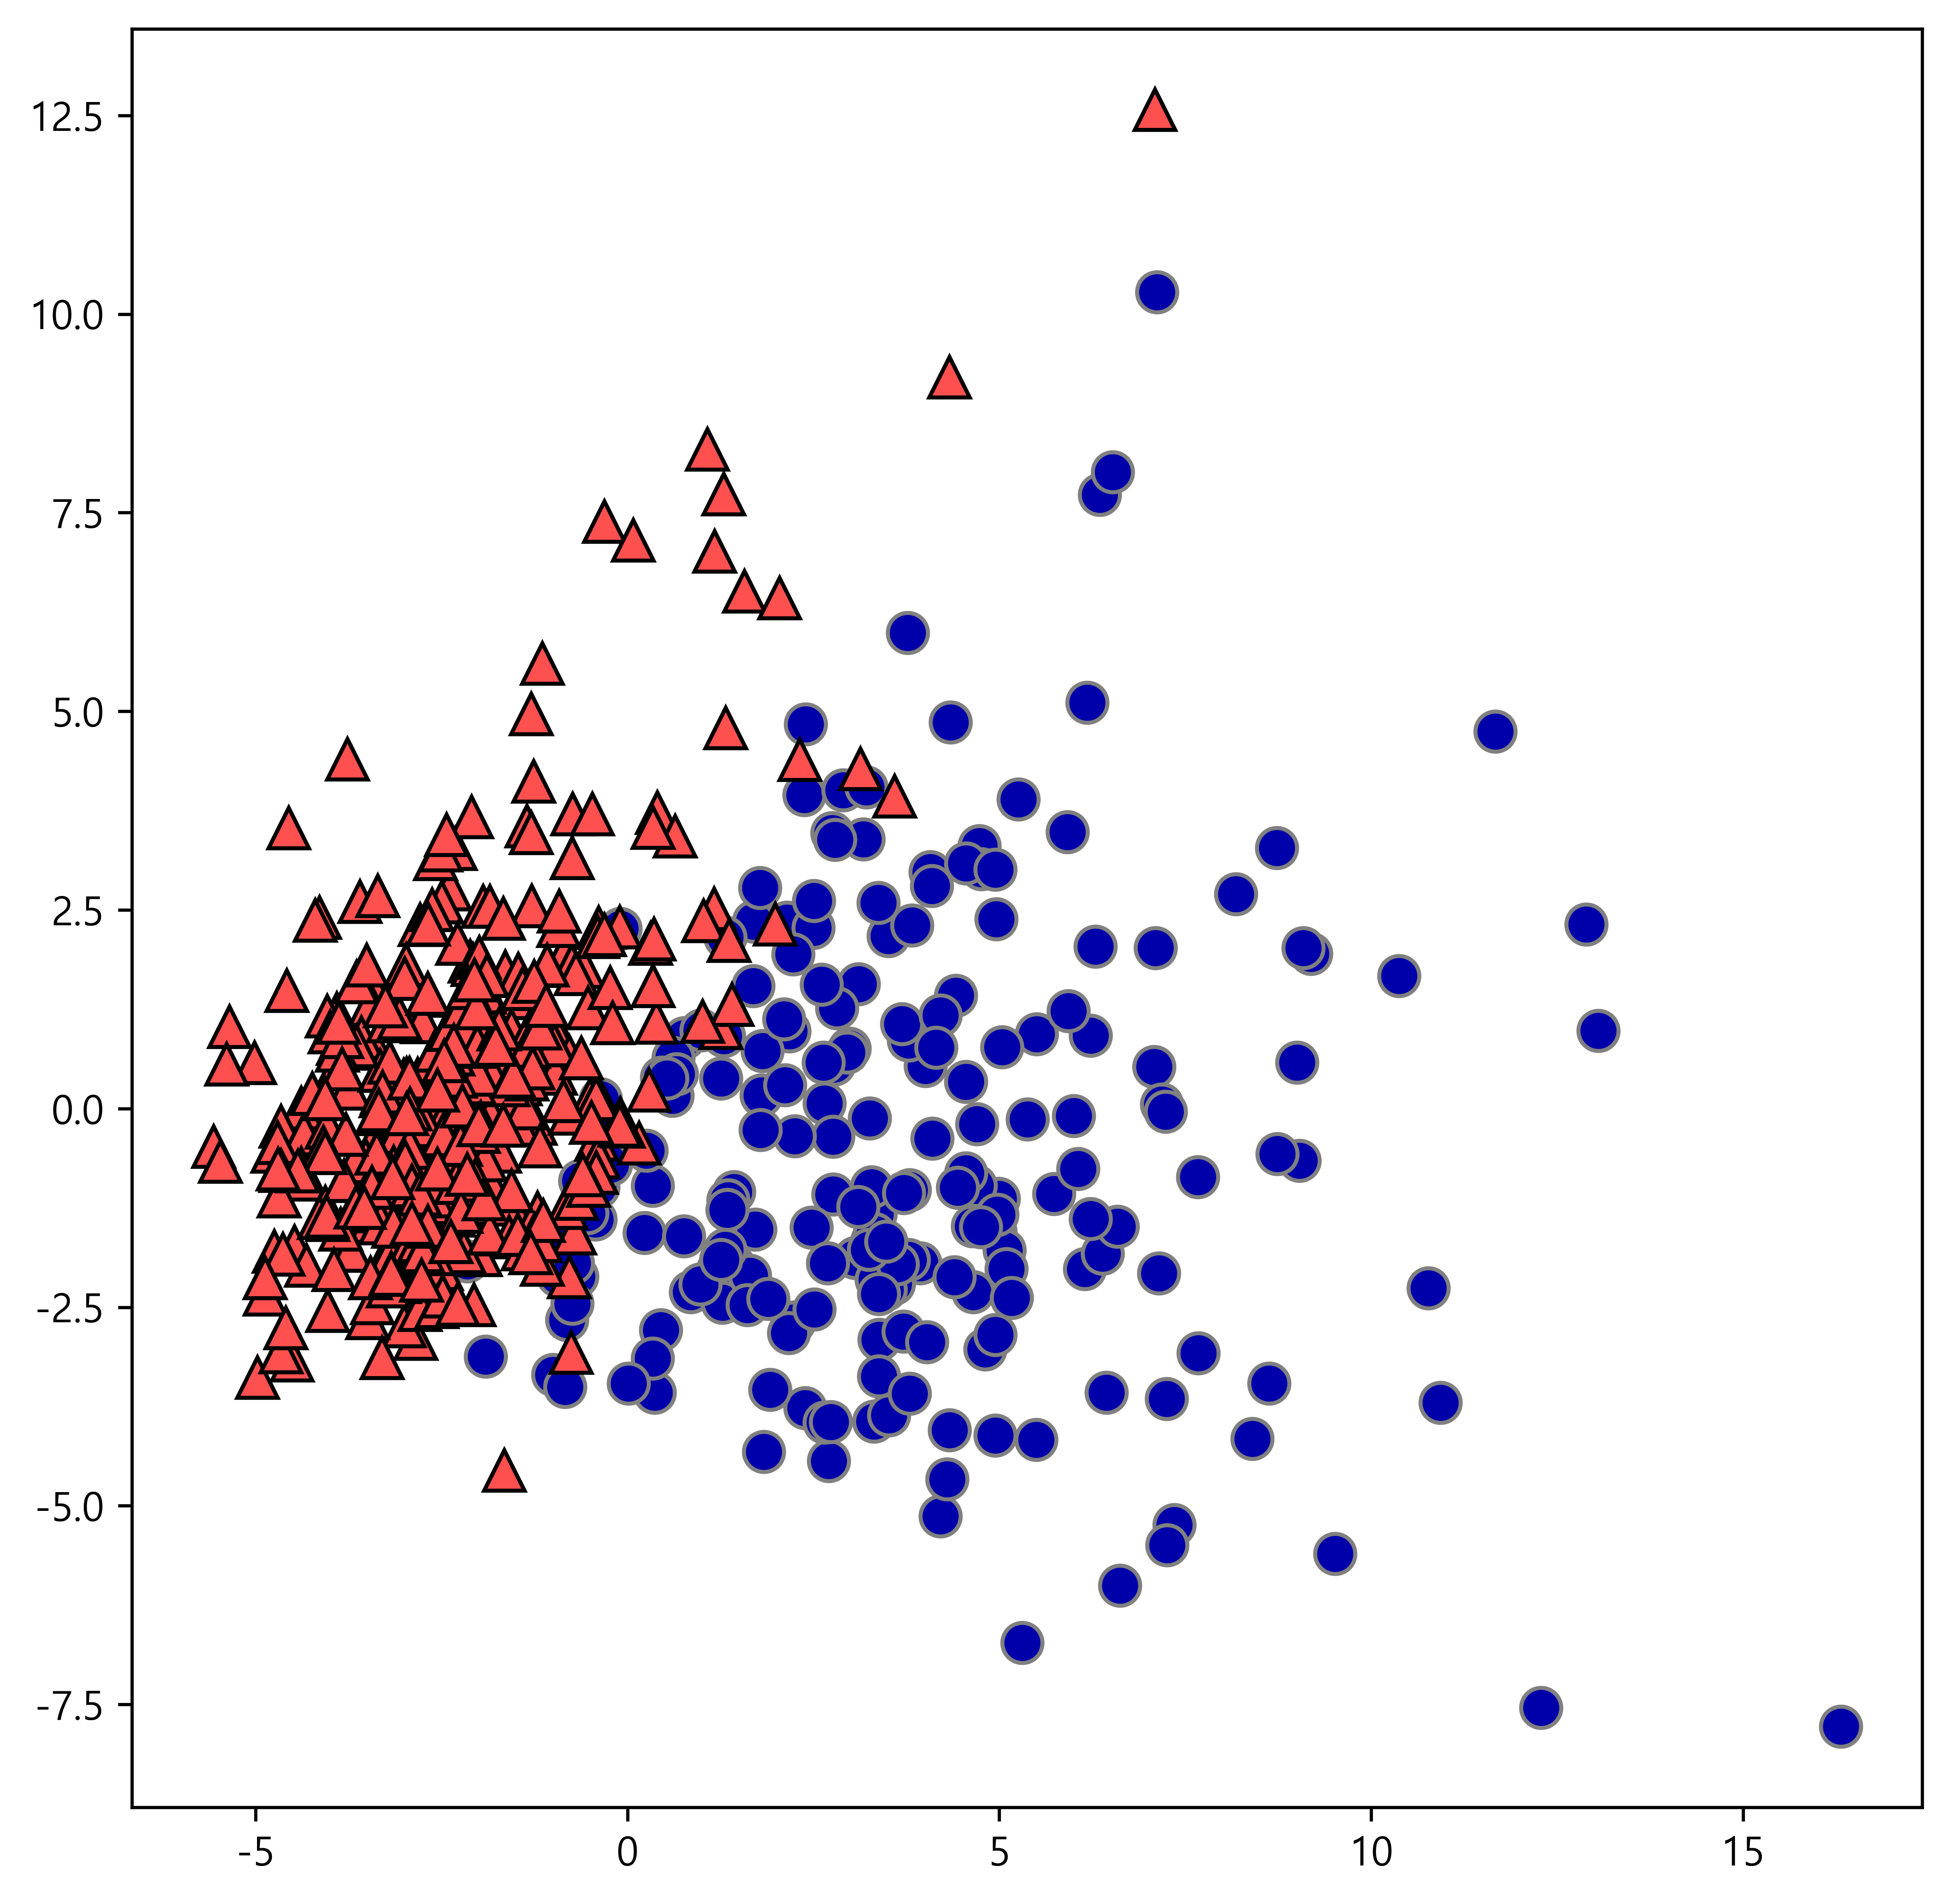

In [8]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.show()

### PCA-Q4. PCA 주성분 확인하기